In [1]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import math
import cv2
import os
import moviepy.editor as mv

In [2]:
490/2

245.0

In [19]:
image1 = PIL.Image.open('./Assets/Images/Disk.png', formats=['png']).resize((int(1000/3), int(1000/3)))
image2 = PIL.Image.open('./286946560/image.png').resize((int(490/3), int(490/3)))
image3 = PIL.Image.open('./Assets/Images/Pin.png').resize((int(1000/3), int(1000/3)))

In [20]:
def resize_canvas(image, canvas_width=500, canvas_height=500):
    """
    Resize the canvas of old_image_path.

    Store the new image in new_image_path. Center the image on the new canvas.

    Parameters
    ----------
    old_image_path : str
    new_image_path : str
    canvas_width : int
    canvas_height : int
    """
    im = image
    old_width, old_height = im.size

    # Center the image
    x1 = int(math.floor((canvas_width - old_width) / 2))
    y1 = int(math.floor((canvas_height - old_height) / 2))

    mode = im.mode
    if len(mode) == 1:  # L, 1
        new_background = (0)
    if len(mode) == 3:  # RGB
        new_background = (0, 0, 0)
    if len(mode) == 4:  # RGBA, CMYK
        new_background = (0, 0, 0, 0)

    newImage = Image.new(mode, (canvas_width, canvas_height), new_background)
    newImage.paste(im, (x1-1, y1, x1 + old_width-1, y1 + old_height))
    
    return newImage

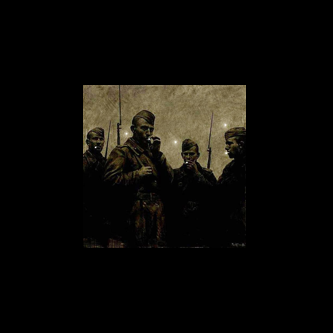

In [24]:
image2 = resize_canvas(image2, canvas_width=int(1000/3), canvas_height=int(1000/3))
image2

In [ ]:
image2.paste(image1, (0,0), image1)
image2

In [47]:
images = [image2.rotate(-3.6*i) for i in range(100)]

In [48]:
for i in range(len(images)):
    images[i].paste(image3, (0,0), image3)

In [49]:
for i, img in enumerate(images):
    img.save(f'./gif/img{i}.png')

In [51]:
image_folder = './gif'
video_name = 'video.mp4'

images = [img for img in sorted(os.listdir(image_folder), key=lambda x: int(x.split('.')[0][3:])) if img.endswith(".png")]*12
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 20, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [52]:
clip = mv.VideoFileClip('video.mp4')
audio = mv.AudioFileClip('./286946560/audio_cut.mp3')

final = clip.set_audio(audio)


In [54]:
final.write_videofile('final.mp4')

Moviepy - Building video final.mp4.
MoviePy - Writing audio in finalTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video final.mp4



Moviepy - Done !
Moviepy - video ready final.mp4


In [ ]:
final = mv.concatenate([clip, clip])
final.write_videofile('merged.mp4')

In [79]:
final.ipython_display(width=480)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



TypeError: must be real number, not NoneType

In [9]:
360/100

3.6